# Hypnogram Analysis
Kate Feng, Winter 2024

Analyzing and comparing hypnograms from two different sensors and the golden standard.

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as mpl

In [2]:
# importing all hypnograms (hypno_sensor1, hypno_sensor2, hypno_GS)
df_one = pd.read_csv('sensor1/sensor_1_output.csv')
df_two = pd.read_csv('sensor1/sensor_2_output.csv')
df_psg = pd.read_csv('gold_standard/sensor_GS_output.csv')

In [3]:
# converting the hypnograms to values
df_one
hypno_one = df_one["SleepPhase"].to_numpy() 
hypno_one = np.repeat(hypno_one,10)
hypno_one = hypno_one.astype(int)
hypno_one

array([4, 4, 4, ..., 3, 3, 3])

In [4]:
df_two
hypno_two = df_two["SleepPhase"].to_numpy() 
hypno_two = np.repeat(hypno_two,10)
hypno_two = hypno_two.astype(int)
hypno_two

array([1, 1, 1, ..., 2, 2, 2])

In [5]:
df_psg
hypno_psg = df_psg["SleepPhase"].to_numpy() 
hypno_psg = np.repeat(hypno_psg,10)
hypno_psg = hypno_psg.astype(int)
hypno_psg

array([4, 4, 4, ..., 2, 2, 2])

In [6]:
# create randomized hypnogram data
hypno_random = np.random.randint(1, 5, size=(840))
hypno_random = np.repeat(hypno_random,10)
hypno_random = hypno_random.astype(int)
hypno_random

array([2, 2, 2, ..., 1, 1, 1])

In [7]:
# calculating the norm 0 distance between these hypnograms 
hypno_sensor1 = hypno_one
hypno_sensor2 = hypno_two
distance_1_2 = np.linalg.norm(hypno_sensor1 - hypno_sensor2,0)/len(hypno_sensor1)

# calculating with golden standard
distance_1_psg = np.linalg.norm(hypno_sensor1 - hypno_psg,0)/len(hypno_sensor1)
distance_2_psg = np.linalg.norm(hypno_sensor2 - hypno_psg,0)/len(hypno_sensor2)

print("Sensor 1 and 2: " + str(distance_1_2))
print("Sensor 1 and PSG: " + str(distance_1_psg))
print("Sensor 2 and PSG: " + str(distance_2_psg))

difference = distance_1_psg - distance_2_psg
print('The two have a difference of: ' + str(difference) + ', so there is no difference between them.')

# distance with random signal
distance_psg_random = np.linalg.norm(hypno_psg - hypno_random,0)/len(hypno_psg)
print("Sensor PSG and Random: " + str(distance_psg_random))

Sensor 1 and 2: 0.46785714285714286
Sensor 1 and PSG: 0.4380952380952381
Sensor 2 and PSG: 0.4380952380952381
The two have a difference of: 0.0, so there is no difference between them.
Sensor PSG and Random: 0.7726190476190476


In [8]:
count = 0
for i in range(len(hypno_sensor1)):
    if hypno_sensor1[i] == hypno_psg[i]:
        count += 1
print('Similarities between sensor 1 and the psg: ' + str(count))

Similarities between sensor 1 and the psg: 4720


In [9]:
count = 0
for i in range(len(hypno_sensor2)):
    if hypno_sensor2[i] == hypno_psg[i]:
        count += 1
print('Similarities between sensor 2 and the psg: ' + str(count))

Similarities between sensor 2 and the psg: 4720


In [10]:
count = 0
for i in range(len(hypno_sensor2)):
    if hypno_sensor1[i] == hypno_sensor2[i]:
        count += 1
print('Similarities between sensor 1 and the sensor 2: ' + str(count))

Similarities between sensor 1 and the sensor 2: 4470


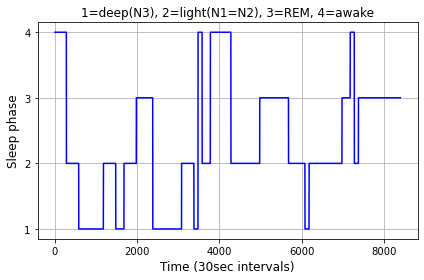

In [11]:
# printing the three signals

def plot_hypno(signal,color):
  x = np.arange(len(signal))
  y = signal
  
  fontsizeV = 12
  mpl.plot(x,y,color=color)
  mpl.xlabel('Time (30sec intervals)',fontsize=fontsizeV)
  mpl.ylabel('Sleep phase',fontsize=fontsizeV)
  mpl.yticks([1,2,3,4])
  mpl.title('1=deep(N3), 2=light(N1=N2), 3=REM, 4=awake')
  mpl.grid(True)
  mpl.tight_layout()
  
plot_hypno(hypno_one, 'blue')

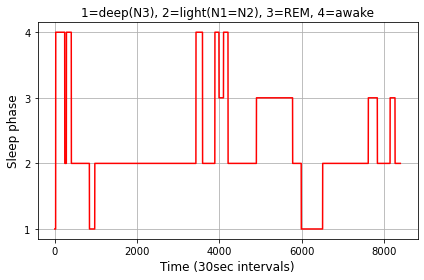

In [12]:
plot_hypno(hypno_two, 'red')

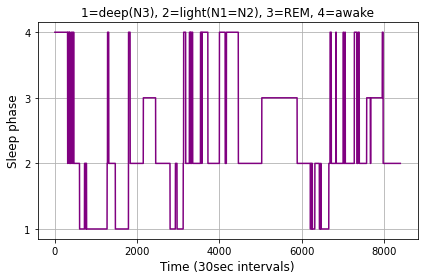

In [13]:
plot_hypno(hypno_psg, 'purple')

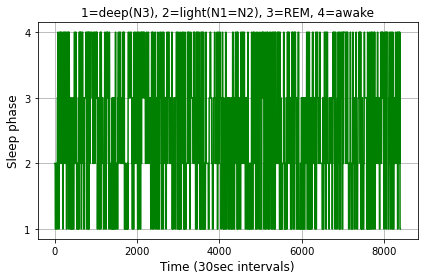

In [14]:
plot_hypno(hypno_random, 'green')

## The two hypnograms are visually different, however the similarities between each sensor to the gold standard are equivalent.